In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Health Insurance dataset (1).xlsx to Health Insurance dataset (1).xlsx


In [ ]:
import pandas as pd
import io
data = pd.read_excel('Health Insurance dataset (1).xlsx')
df= pd.DataFrame(data)
print(df.head())

  Incurred_Date   Clm_Date Clm_Settled_Date  Amount_Claimed  Amount_Paid  \
0    2020-05-10 2020-06-04       2020-06-19            1062          736   
1    2020-07-15 2020-08-09       2020-08-24             838          105   
2    2020-06-10 2020-07-05       2020-07-20             970          768   
3    2020-08-12 2020-09-06       2020-09-21            1075          623   
4    2020-03-22 2020-04-16       2020-05-01            1171          838   

   Ancillary_Claimed_Amount  Ancillary_Paid_Amount  Amount_Pending  \
0                       158                     67             256   
1                       234                      8             471   
2                       151                    120             375   
3                        14                      3             510   
4                        82                     42             381   

   Amount_Adjusted  Deductible Status_Change_Date Service_Start_Date  \
0              117         246         2020-06-21 

In [ ]:
import scipy.stats as stats
import numpy as np
print(df.describe(exclude=[np.datetime64,object]))

       Amount_Claimed  Amount_Paid  Ancillary_Claimed_Amount  \
count     8659.000000  8659.000000               8659.000000   
mean       995.597991   552.683335                199.352812   
std        289.504765   373.706668                115.742732   
min        501.000000  -662.000000                  1.000000   
25%        741.000000   286.000000                 99.000000   
50%        993.000000   551.000000                198.000000   
75%       1247.000000   830.000000                301.000000   
max       1500.000000  1576.000000                400.000000   

       Ancillary_Paid_Amount  Amount_Pending  Amount_Adjusted   Deductible  
count            8659.000000     8659.000000      8659.000000  8659.000000  
mean               99.118374      424.988913       212.551796   299.481233  
std                88.496695      136.370136       146.493178   116.819598  
min                 0.000000      106.000000         0.000000   100.000000  
25%                25.000000      324.

In [ ]:
all_columns = df.columns
numeric_columns = ['Amount_Claimed','Amount_Paid','Ancillary_Claimed_Amount','Ancillary_Paid_Amount','Amount_Pending','Amount_Adjusted','Deductible']
skewness = df[numeric_columns].skew()
kurtosis = df[numeric_columns].kurtosis()
result_df = pd.DataFrame({
    'Column': numeric_columns,
    'Skewness': skewness,
    'Kurtosis': kurtosis
})

print(result_df)

                                            Column  Skewness  Kurtosis
Amount_Claimed                      Amount_Claimed  0.029072 -1.199118
Amount_Paid                            Amount_Paid -0.069304 -0.492849
Ancillary_Claimed_Amount  Ancillary_Claimed_Amount  0.012955 -1.206183
Ancillary_Paid_Amount        Ancillary_Paid_Amount  0.965050  0.118374
Amount_Pending                      Amount_Pending  0.007422 -0.699203
Amount_Adjusted                    Amount_Adjusted  0.645784 -0.261199
Deductible                              Deductible  0.009558 -1.225119


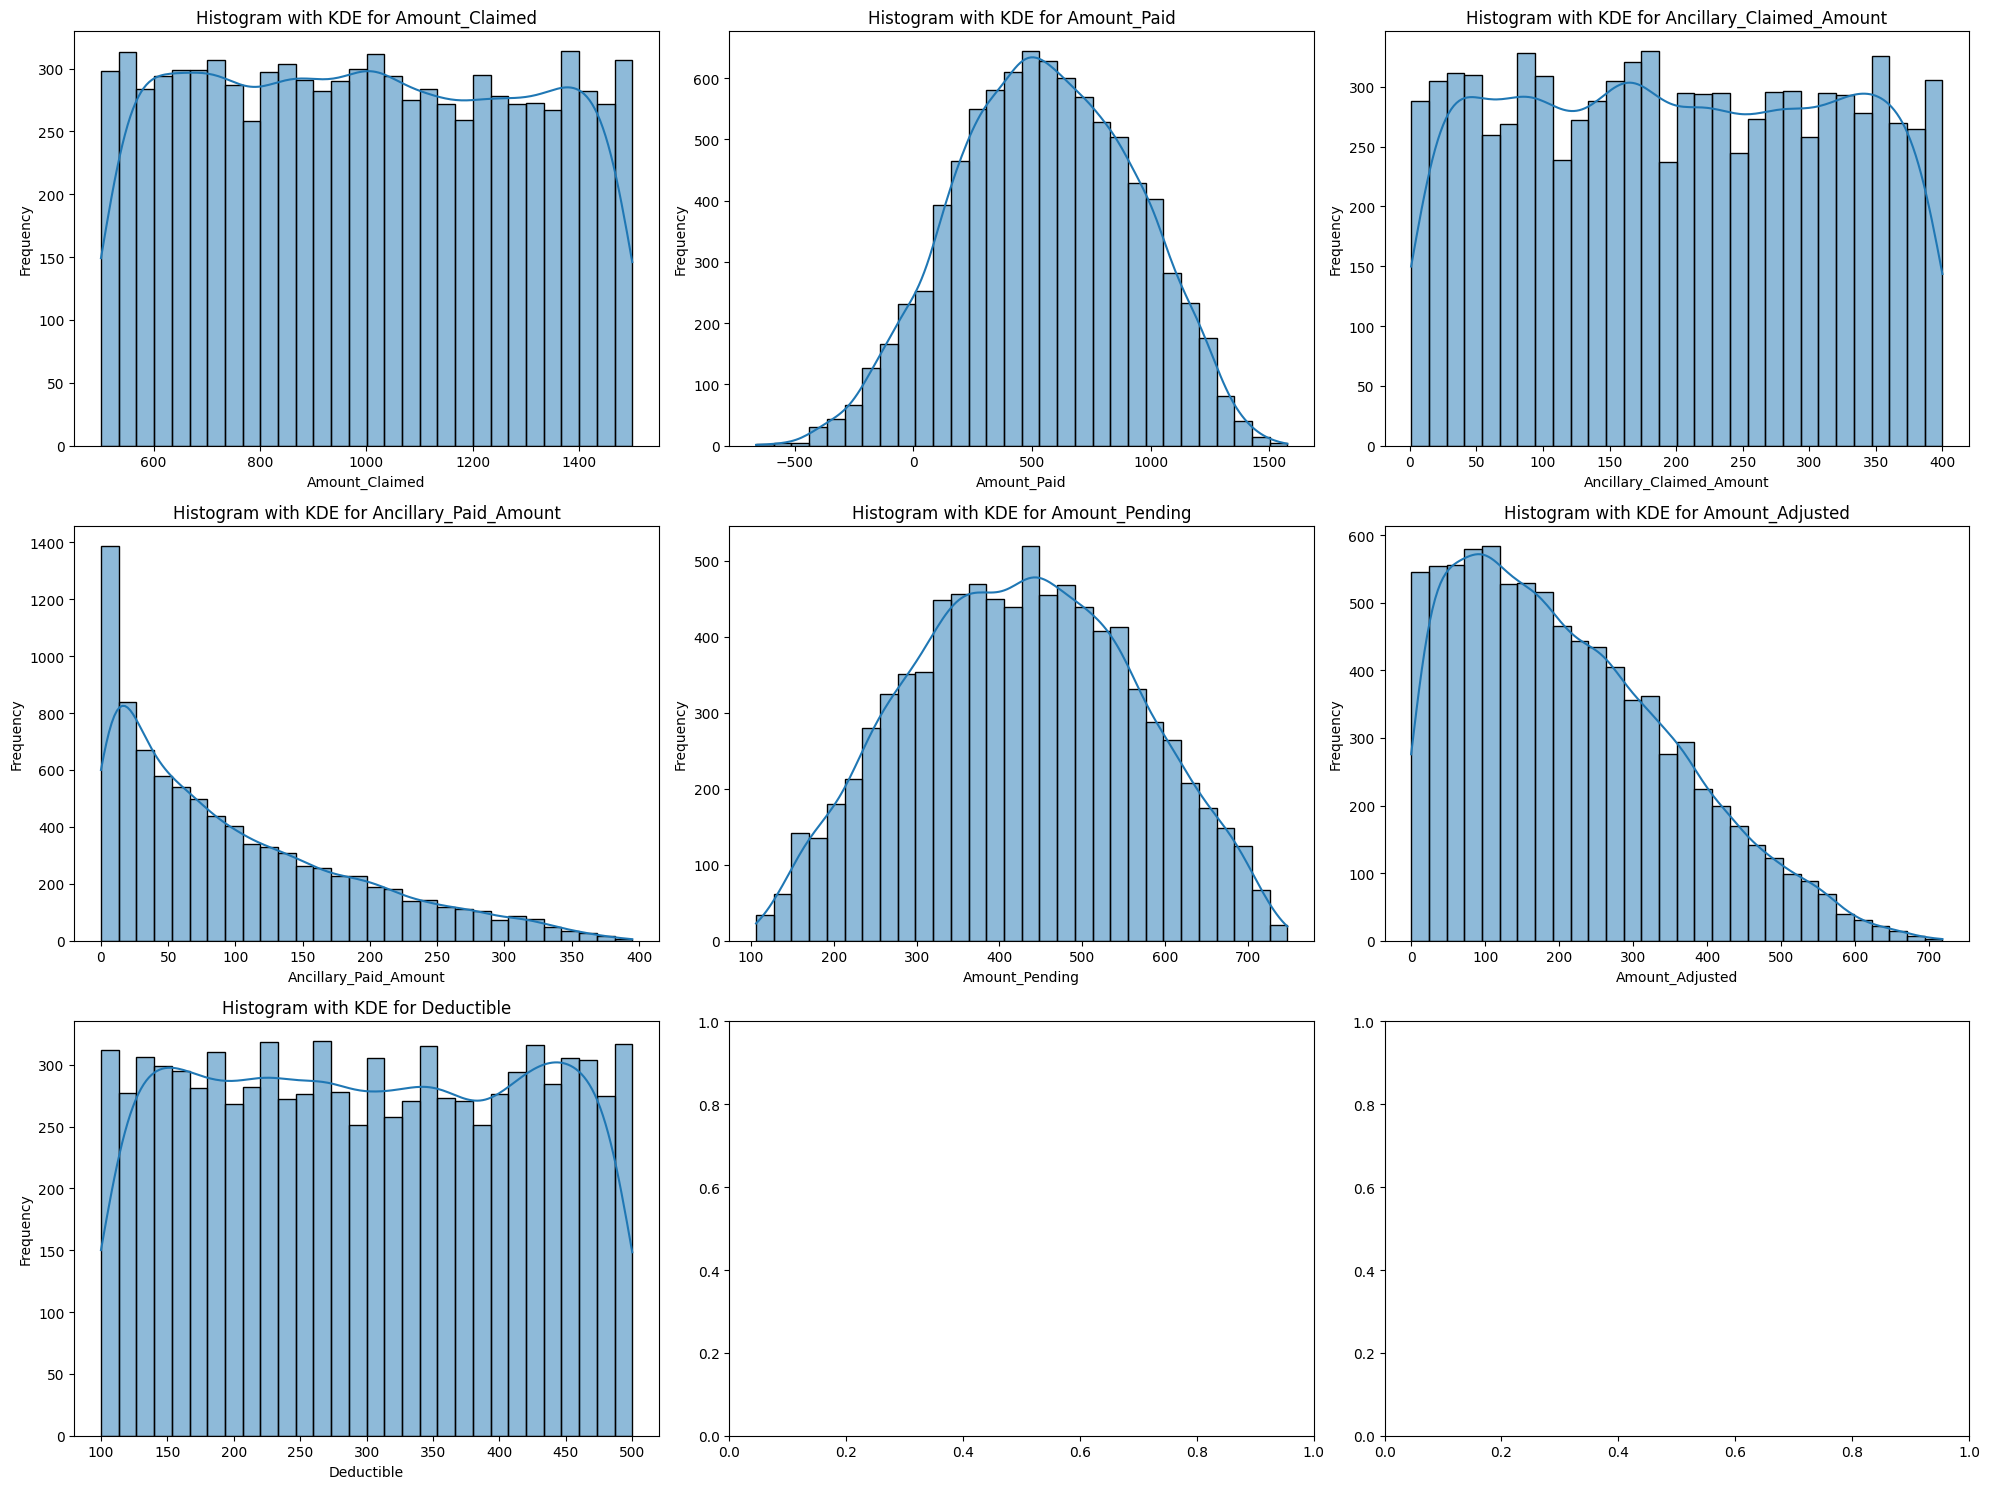

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))
for i, column in enumerate(numeric_columns):
    row = i // 3
    col = i % 3
    sns.histplot(df[column], kde=True, bins=30, ax=axes[row, col])
    axes[row, col].set_title(f'Histogram with KDE for {column}')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

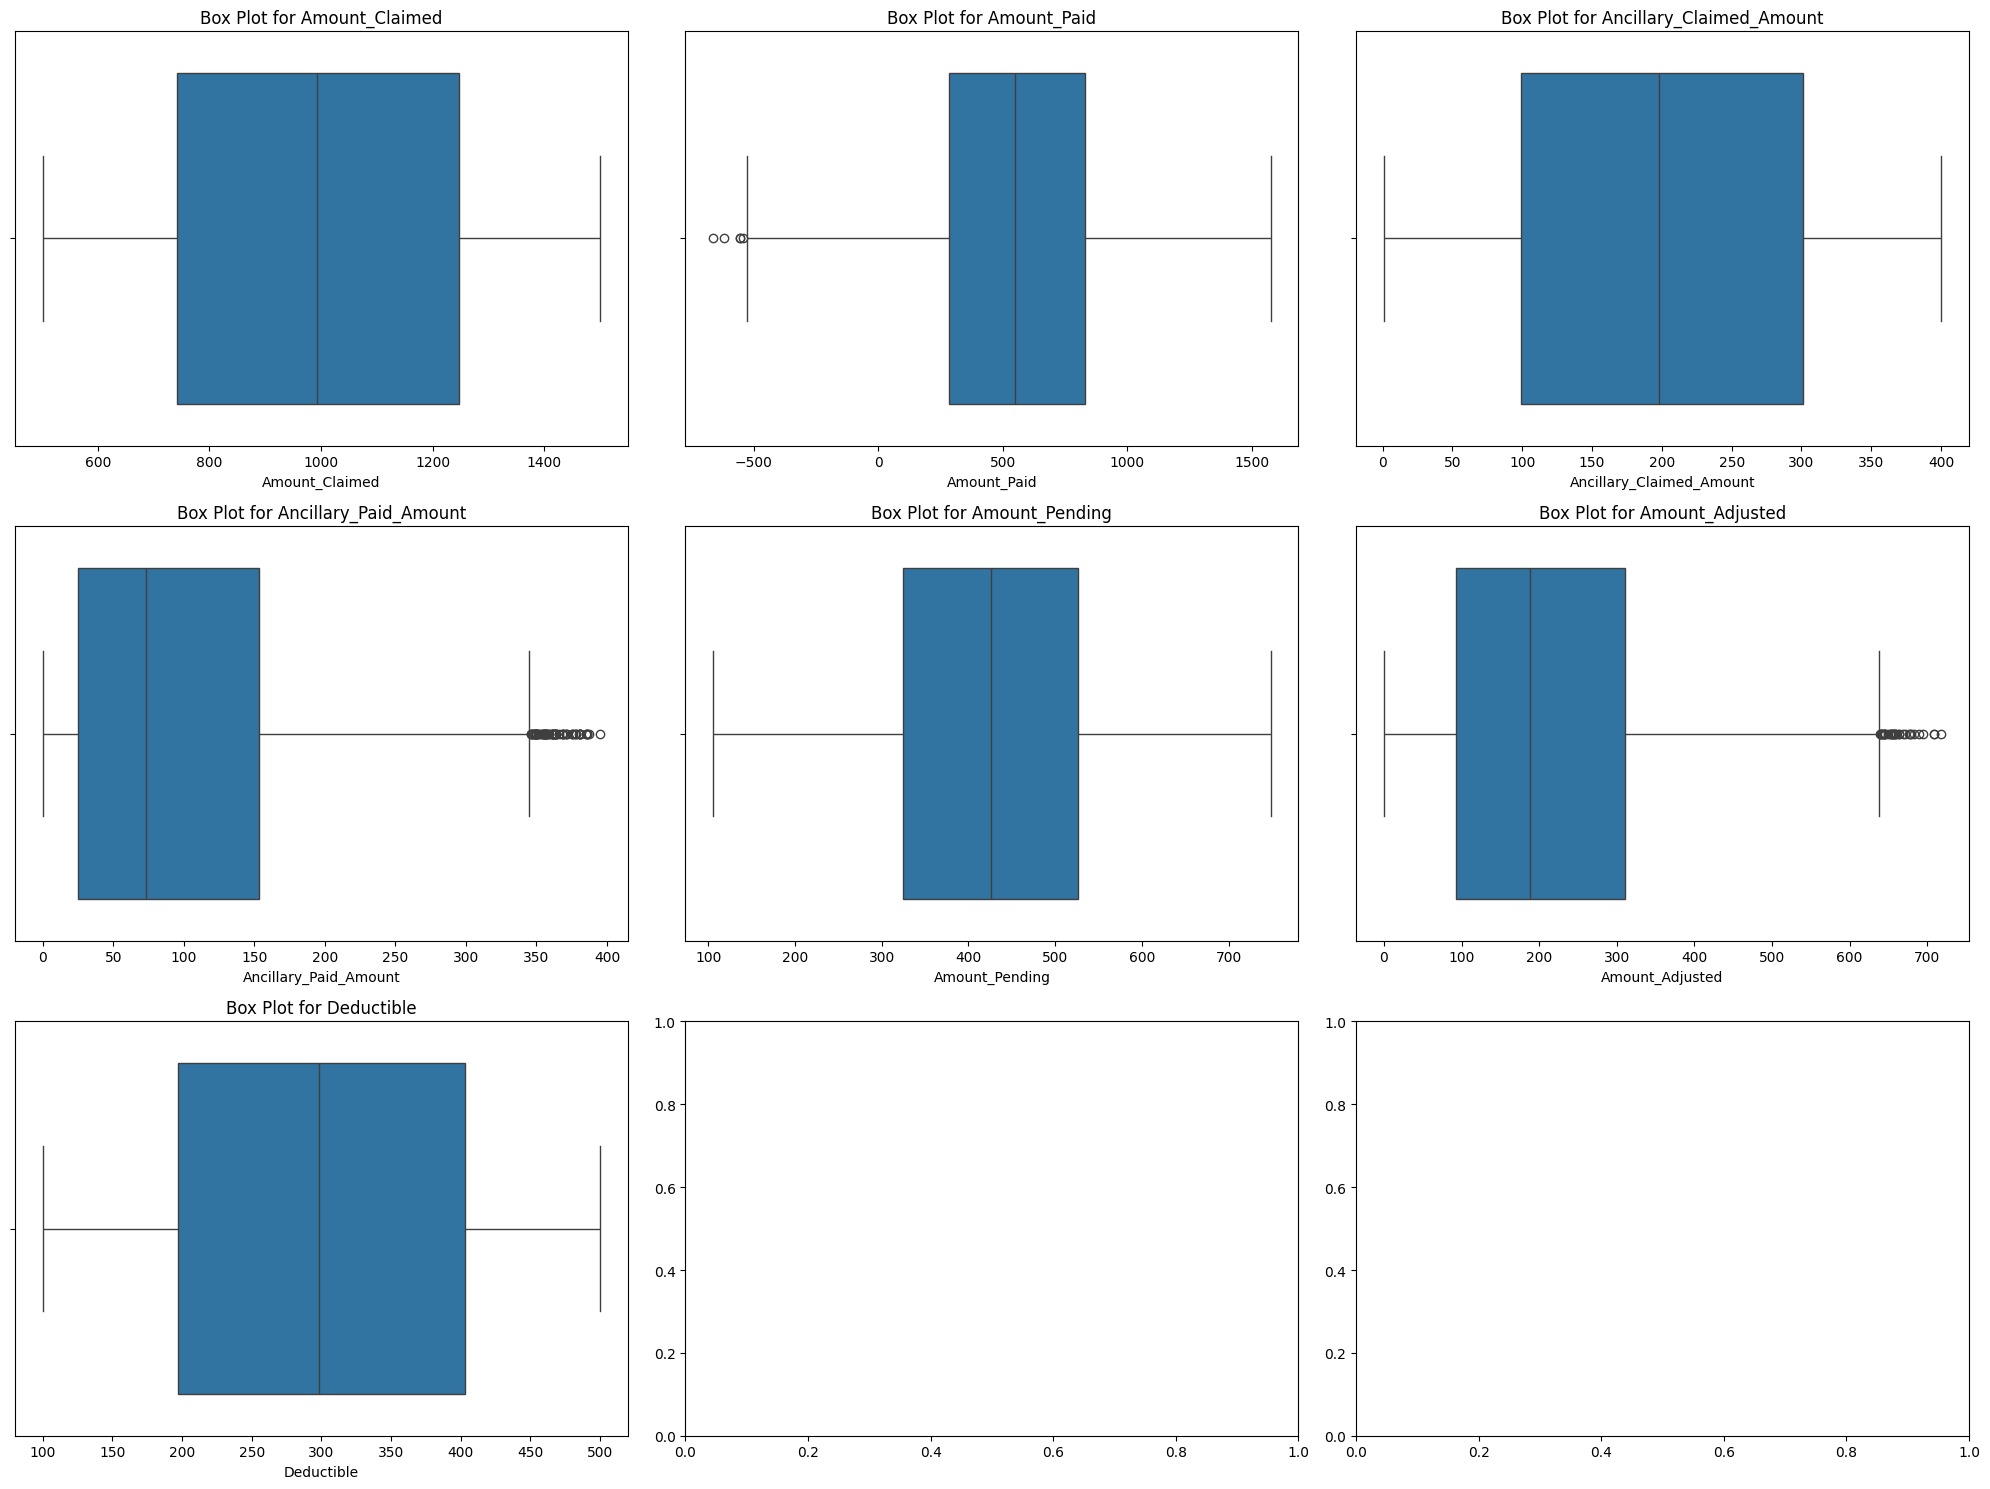

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))
for i, column in enumerate(numeric_columns):
    row = i // 3
    col = i % 3
    sns.boxplot(x=df[column], ax=axes[row, col])
    axes[row, col].set_title(f'Box Plot for {column}')
    axes[row, col].set_xlabel(column)
plt.tight_layout()
plt.show()

                          Amount_Claimed  Amount_Paid  \
Amount_Claimed                  1.000000     0.772956   
Amount_Paid                     0.772956     1.000000   
Ancillary_Claimed_Amount       -0.012905     0.147055   
Ancillary_Paid_Amount          -0.009136     0.228757   
Amount_Pending                 -0.000291    -0.443037   
Amount_Adjusted                -0.002262    -0.515366   
Deductible                      0.001444    -0.463879   

                          Ancillary_Claimed_Amount  Ancillary_Paid_Amount  \
Amount_Claimed                           -0.012905              -0.009136   
Amount_Paid                               0.147055               0.228757   
Ancillary_Claimed_Amount                  1.000000               0.659312   
Ancillary_Paid_Amount                     0.659312               1.000000   
Amount_Pending                           -0.007688              -0.000698   
Amount_Adjusted                          -0.006863               0.001067   
Dedu

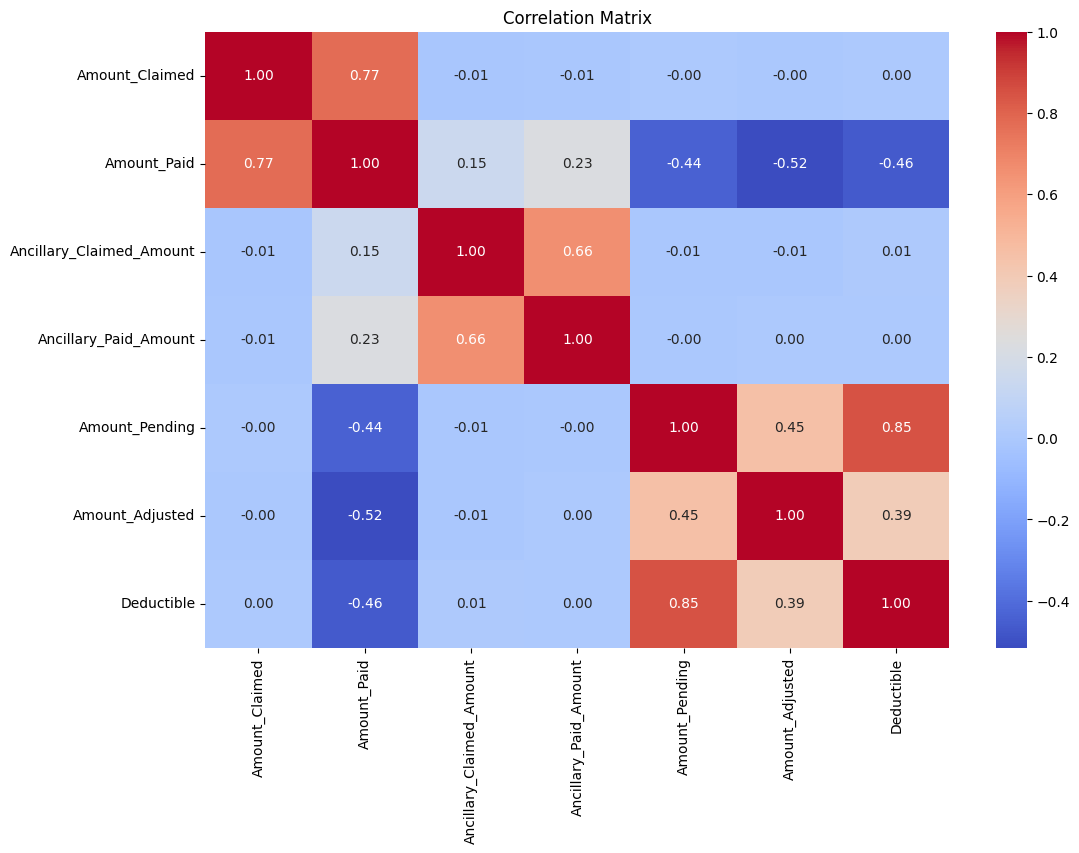

In [ ]:
correlation_matrix = df[numeric_columns].corr()
print(correlation_matrix)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

   Amount_Claimed  Amount_Paid   Ancillary_Claimed_Amount  \
0       -1.346766     -0.776197                  0.027635   
1        1.798630     -0.380635                  0.164572   
2       -1.108520     -0.315511                  0.116889   
3        0.105437     -1.628529                 -1.027111   
4       -1.237518     -1.195651                 -0.682814   

   Ancillary_Paid_Amount  Amount_Pending  Amount_Adjusted  
0               0.017440        0.047804         0.551308  
1               0.545561        0.966210         0.740401  
2               0.930715       -0.461096         0.013700  
3               0.383222       -0.401830        -0.658233  
4              -0.611971       -0.284999        -0.694645  


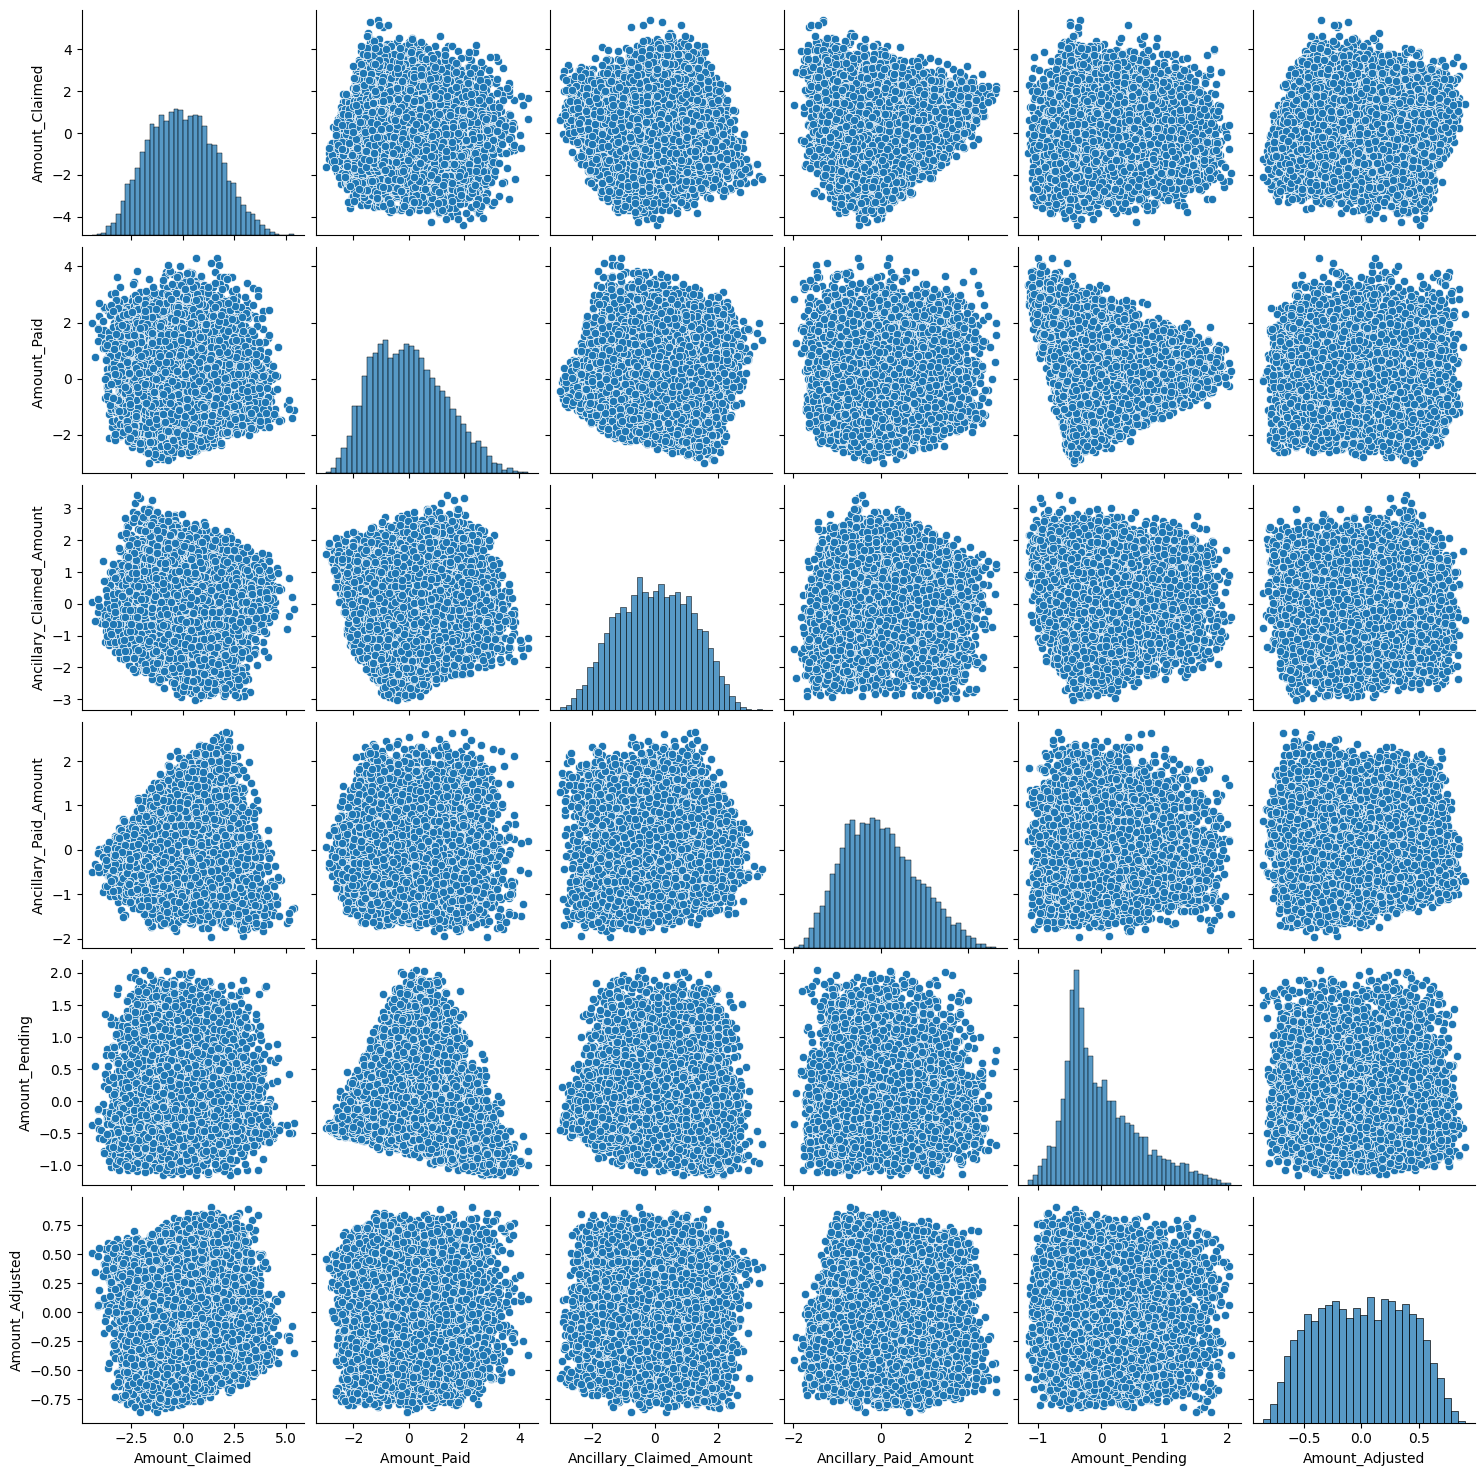

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numeric_columns])
pca = PCA(n_components=6)
principal_components = pca.fit_transform(scaled_data)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data = principal_components, columns = ['Amount_Claimed', 'Amount_Paid ','Ancillary_Claimed_Amount','Ancillary_Paid_Amount','Amount_Pending','Amount_Adjusted'])
print(pca_df.head())

sns.pairplot(pca_df)
plt.show()


In [ ]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

# Convert categorical variables to numeric if necessary
X = df.drop(columns=['Amount_Paid','Clm_Date','Clm_Settled_Date','Status_Change_Date','Service_Start_Date','Service_End_Date','Last_Record_Flag','Last_Updated_Date','Incurred_Date'])
y = df['Amount_Paid']

for col in X.select_dtypes(include=['datetime']):
    X[col] = X[col].apply(lambda x: x.toordinal())
# Chi-square test
chi_scores = chi2(X, y)

# Create a DataFrame with chi-square scores
chi2_df = pd.DataFrame({'Feature': X.columns, 'Chi2': chi_scores[0], 'P-value': chi_scores[1]})
chi2_df = chi2_df.sort_values(by='Chi2', ascending=False)

print("Top features based on Chi-Square test:")
print(chi2_df.head(10))



Top features based on Chi-Square test:
                    Feature           Chi2  P-value
0            Amount_Claimed  588632.808866      0.0
4           Amount_Adjusted  178284.801681      0.0
2     Ancillary_Paid_Amount  163665.648517      0.0
3            Amount_Pending  118679.374695      0.0
1  Ancillary_Claimed_Amount  115475.191404      0.0
5                Deductible  103048.202853      0.0


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Initialize the model with a faster solver and reduced iterations
model = LogisticRegression(solver='saga', max_iter=500)

# Initialize RFE with parallel processing and reduced features to select
rfe = RFE(model, n_features_to_select=5, step=0.2)  # Select top 5 features, use step to remove 20% at a time

# Sample the data (if X is large)
X_sample, y_sample = X.sample(frac=0.5, random_state=42), y.sample(frac=0.5, random_state=42)

# Fit RFE on the sample
rfe.fit(X_sample, y_sample)

# Get selected features
selected_features = X.columns[rfe.support_]
print("Selected features based on RFE:")
print(selected_features)

KeyboardInterrupt: 

In [ ]:
import statsmodels.api as sm
# Add a constant column for the intercept
X_with_const = sm.add_constant(X)

# Fit the initial model with all features
initial_model = sm.OLS(y, X_with_const).fit()

# Perform backward elimination
final_model = sm.OLS(y, X_with_const).fit()

# Display the summary of the final model
print(final_model.summary())


In [ ]:
from sklearn.linear_model import Lasso

# Initialize Lasso with regularization strength (alpha)
lasso = Lasso(alpha=0.01)

# Fit the model
lasso.fit(X, y)

# Get coefficients and select features
selected_features = X.columns[lasso.coef_ != 0]
print("Selected features based on Lasso:")
print(selected_features)


Selected features based on Lasso:
Index(['Amount_Claimed', 'Ancillary_Claimed_Amount', 'Ancillary_Paid_Amount',
       'Amount_Pending', 'Amount_Adjusted', 'Deductible'],
      dtype='object')


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd

# Initialize the model with fewer trees and limited depth
model = RandomForestClassifier(n_estimators=50, max_depth=10, max_features='sqrt')

# Fit the model (consider fitting on a sample if X is too large)
X_sample, y_sample = X.sample(frac=0.5, random_state=42), y.sample(frac=0.5, random_state=42)
model.fit(X_sample, y_sample)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame with feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Top features based on Random Forest importance:")
print(importance_df.head(10))


Top features based on Random Forest importance:
                    Feature  Importance
0            Amount_Claimed    0.195955
3            Amount_Pending    0.179745
4           Amount_Adjusted    0.168868
2     Ancillary_Paid_Amount    0.156976
5                Deductible    0.149544
1  Ancillary_Claimed_Amount    0.148912


In [ ]:
from sklearn.feature_selection import mutual_info_classif

# Compute mutual information
mi = mutual_info_classif(X, y)

# Create a DataFrame with mutual information scores
mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual_Info': mi})
mi_df = mi_df.sort_values(by='Mutual_Info', ascending=False)

print("Top features based on Mutual Information:")
print(mi_df.head(10))


Top features based on Mutual Information:
                    Feature  Mutual_Info
0            Amount_Claimed     0.718021
3            Amount_Pending     0.109230
5                Deductible     0.085248
1  Ancillary_Claimed_Amount     0.035828
4           Amount_Adjusted     0.026352
2     Ancillary_Paid_Amount     0.025695


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Select the top 10 features based on ANOVA F-test
selector = SelectKBest(f_classif, k='all')
X_new = selector.fit_transform(X, y)

# Get selected features
selected_features = X.columns[selector.get_support()]
print("Selected features based on ANOVA F-test:")
print(selected_features)


Selected features based on ANOVA F-test:
Index(['Amount_Claimed', 'Ancillary_Claimed_Amount', 'Ancillary_Paid_Amount',
       'Amount_Pending', 'Amount_Adjusted', 'Deductible'],
      dtype='object')
